# **This is an adaption of a GitHub notebook tha looks at Reddits on wallstreets bets. The Notebook is divided into two sections:**
1. [Oringial Section](#1---Oringial-Section)

that does the basic analsysis. We need to run this to set up the datastructures in the notebook

2. [New Section](#2---New-Section)

That builds on the data structures<br>


# 1. Oringial Section
## **This is a initial descriptive analysis of the Reddit wallstreetbets posts. It contains a basic statistics of words, character count, and occurence. At the bottom, you will find the analysis of the most common mentioned NYSE or other stock tickers. Enjoy!**

**Short summary:**
The average title length is 11 words.
The average title length is 120 words.
The most popular words are, without a surprise: gme, buy, robinhood, hold, amc.
The most popular tickers are: gme, know, one, hold, see, time, big, amc

# Import the libraries

In [1]:
import os
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from datetime import date, datetime
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from scipy import stats
from nltk.corpus import stopwords
from collections import Counter


Bad key "text.kerning_factor" on line 4 in
C:\Users\Hassan\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


KeyboardInterrupt: 

In [ ]:
# additional imports
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import datetime
import time
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

# Read the dataframe

In [ ]:
df = pd.read_csv('./reddit_wsb.csv')

# Check the head of the dataframe

In [ ]:
df.head(2)

# Drop useless columns

In [ ]:
df = df.drop(columns=['id', 'url', 'created'])
df.head(2)

In [98]:
df.shape

(50698, 5)

# Add a few data realted columns for further analysis

In [99]:
from datetime import date, datetime
year_col = []
month_col = []
hour_col = []
minute_col = []
for i, content in df['timestamp'].items():
    t1 = datetime.strptime(content, '%Y-%m-%d %H:%M:%S')
    year_col.append(t1.year)
    month_col.append(t1.month)
    hour_col.append(t1.hour)
    minute_col.append(t1.minute)
df['year'] = year_col
df['month'] = month_col
df['hour'] = hour_col
df['minute'] = minute_col

In [100]:
df.head()

,title,score,comms_num,body,timestamp,year,month,hour,minute
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41,2021,1,21,37
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,2021,1,21,32
2,Exit the system,0,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,2021,1,21,30
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57,2021,1,21,28
4,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56,2021,1,21,26


# Normalize the text to be lowercase

In [101]:
df['title'] = df['title'].str.lower()
df['body'] = df['body'].str.lower()

In [102]:
df.drop_duplicates(subset=['title'], keep='first', inplace=True)
df.shape

(49339, 9)

# Descriptive statistics - title

**Count the number of characters and length of a title**

In [103]:
count = df['title'].str.split().str.len()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)

print("Total number of words: ", count.sum(), "words")

Total number of words:  548438 words


In [104]:
print("Average number of words per post: ", round(count.mean(),2), "words")
print("Max number of words per post: ", count.max(), "words")
print("Min number of words per post: ", count.min(), "words")

Average number of words per post:  11.12 words
Max number of words per post:  66 words
Min number of words per post:  1 words


In [ ]:
def word_count(df):
    """
    This function takes the dataframe and adds a new column with the number of words.
    :param df: The dataframe to be transformed.
    :return: The transformed dataframe.
    """
    words_count = []
    for i, content in df['title'].items():
        new_values =[]
        new_values = content.split()
        words_count.append(len(new_values))
    df['title_word_count'] = words_count
    return df

# df = word_count(df)

# df.head()

In [106]:
df['title_length'] = df['title'].str.len()

print("Total length of a dataset: ", df.title_length.sum(), "characters")
print("Average length of a tweet: ", round(df.title_length.mean(),0), "characters")
print(df.head())

Total length of a dataset:  2947094 characters
Average length of a tweet:  60.0 characters
                                               title  score  comms_num  \
0  it's not about the money, it's about sending a...     55          6   
1  math professor scott steiner says the numbers ...    110         23   
2                                    exit the system      0         47   
3  new sec filing for gme! can someone less retar...     29         74   
4  not to distract from gme, just thought our amc...     71        156   

                                                body            timestamp  \
0                                                NaN  2021-01-28 21:37:41   
1                                                NaN  2021-01-28 21:32:10   
2  the ceo of nasdaq pushed to halt trading “to g...  2021-01-28 21:30:35   
3                                                NaN  2021-01-28 21:28:57   
4                                                NaN  2021-01-28 21:26:56   

 

In [108]:
df.head()

,title,score,comms_num,body,timestamp,year,month,hour,minute,title_word_count,title_length
0,"it's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41,2021,1,21,37,11,59
1,math professor scott steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,2021,1,21,32,12,80
2,exit the system,0,47,the ceo of nasdaq pushed to halt trading “to g...,2021-01-28 21:30:35,2021,1,21,30,3,15
3,new sec filing for gme! can someone less retar...,29,74,NaN,2021-01-28 21:28:57,2021,1,21,28,13,75
4,"not to distract from gme, just thought our amc...",71,156,NaN,2021-01-28 21:26:56,2021,1,21,26,15,79


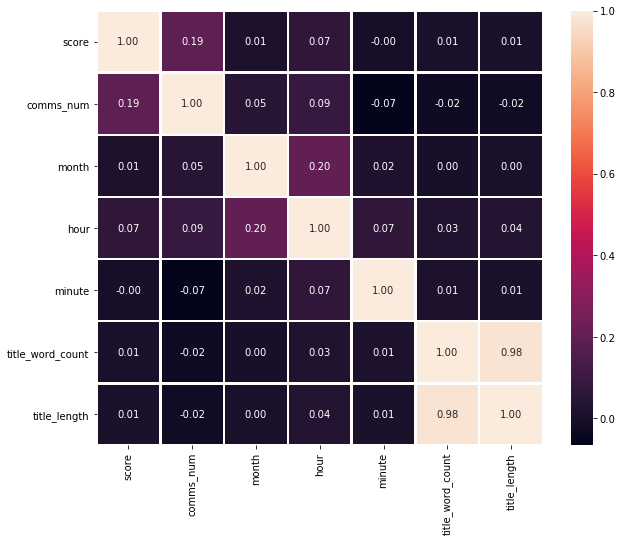

In [107]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.drop(columns=['year']).corr(), annot=True, linewidths=1.5, fmt=".2f");

# Most popular words used in title

In [ ]:
def create_text_blob(df, text_column):
    blob_text=[]
    for i, content in df[text_column].items():
        for i in content.split():
            blob_text.append(i.lower())
    return blob_text

blob_text = create_text_blob(df, 'title')
print(blob_text[0:100])

# Let's remove the stop words

In [77]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  
filtered_sentence = [w for w in blob_text if not w in stop_words]  
filtered_sentence = []  
  
for w in blob_text:  
    if w not in stop_words:  
        filtered_sentence.append(w)  

print(filtered_sentence[0:100])  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['money,', 'sending', 'message.', '🚀💎🙌', 'math', 'professor', 'scott', 'steiner', 'says', 'numbers', 'spell', 'disaster', 'gamestop', 'shorts', 'exit', 'system', 'new', 'sec', 'filing', 'gme!', 'someone', 'less', 'retarded', 'please', 'interpret?', 'distract', 'gme,', 'thought', 'amc', 'brothers', 'aware', 'breaking', 'short', 'stock', 'expiration', 'date', 'moment', 'currently', 'holding', 'amc', 'nok', '-', 'retarded', 'think', 'move', 'gme', 'today?', 'nothing', 'say', 'bruh', 'speechless', 'moon', '🚀🚀🚀💎💎👋👋', 'need', 'keep', 'movement', 'going,', 'make', 'history!', 'gme', 'premarket', '🍁', 'musk', 'approved', '🎮🛑💎✋', 'done', 'gme', '-', '$ag', '$slv,', "gentleman's", 'short', 'squeeze,', 'driven', 'macro', 'fundamentals', '$gme', 'price', 'nothing', 'fundamentals', 'everything', 'financial', 'economics', 'love', 'retards!!!!', '420', 'wasn’t', 'meme.', 'gme', '🚀', '🚀', '🚀', 'mass', 'relays', '&', 'beyond', 'come', 'back', 'now...', 'turn']


In [78]:
counts = Counter(filtered_sentence)

# Let's print the most popular words, used over 700 times

In [79]:
# sorted_top_20_words

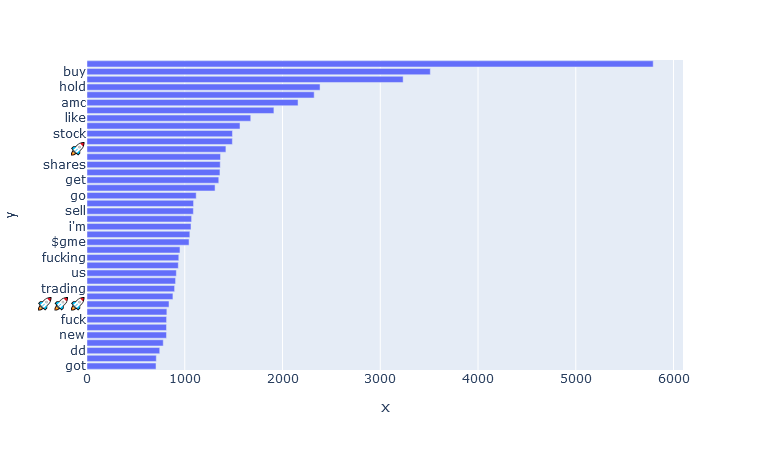

In [80]:
import plotly.express as px

top_20_words = {}

for (key, value) in counts.items():
   # Check if value is greater than 200 and add to new dictionary
    if value > 700 :
        top_20_words[key] = value
    continue

sorted_top_20_words = dict(sorted(top_20_words.items(), key=lambda item: item[1], reverse=False))

word = sorted_top_20_words.keys()
count = sorted_top_20_words.values()


fig = px.bar(y=list(word), x=list(count), text = list(count))
fig.update_traces(texttemplate='%{text:}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [81]:
top_20_words_clean = {}

for (key, value) in counts.items():
    # Check if key length is greater than 3 and value greater than 150 and add to new dictionary
    if len(key)>2 and value > 700 :
        top_20_words_clean[key] = value
    continue

sorted_top_20_words_clean = dict(sorted(top_20_words_clean.items(), key=lambda item: item[1], reverse=False))

word = sorted_top_20_words_clean.keys()
count = sorted_top_20_words_clean.values()

# fig = px.bar(y=word, x=count, text = count)
# fig.update_traces(texttemplate='%{text:}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
# fig.show()

# Descriptive statistics - body

In [82]:
count = df['body'].str.split().str.len()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)

print("Total number of words: ", count.sum(), "words")

Total number of words:  4765724.0 words


In [83]:
print("Average number of words per post: ", round(count.mean(),2), "words")
print("Max number of words per post: ", count.max(), "words")
print("Min number of words per post: ", count.min(), "words")

Average number of words per post:  208.47 words
Max number of words per post:  6429.0 words
Min number of words per post:  1.0 words


In [84]:
df['body_length'] = df['body'].str.len()

print("Total length of a dataset: ", df.body_length.sum(), "characters")
print("Average length of a tweet: ", round(df.body_length.mean(),0), "characters")
print(df.head())

Total length of a dataset:  30005406.0 characters
Average length of a tweet:  1313.0 characters
                                               title  score  comms_num  \
0  it's not about the money, it's about sending a...     55          6   
1  math professor scott steiner says the numbers ...    110         23   
2                                    exit the system      0         47   
3  new sec filing for gme! can someone less retar...     29         74   
4  not to distract from gme, just thought our amc...     71        156   

                                                body            timestamp  \
0                                                NaN  2021-01-28 21:37:41   
1                                                NaN  2021-01-28 21:32:10   
2  the ceo of nasdaq pushed to halt trading “to g...  2021-01-28 21:30:35   
3                                                NaN  2021-01-28 21:28:57   
4                                                NaN  2021-01-28 21:26:56 

In [85]:
def create_text_blob(df, text_column):
    blob_text=[]
    for i, content in df[text_column].items():
        for i in str(content).split():
            blob_text.append(i.lower())
    return blob_text

blob_text = create_text_blob(df, 'body')
print(blob_text[0:100])

['nan', 'nan', 'the', 'ceo', 'of', 'nasdaq', 'pushed', 'to', 'halt', 'trading', '“to', 'give', 'investors', 'a', 'chance', 'to', 'recalibrate', 'their', 'positions”.', '[https://mobile.twitter.com/mediaite/status/1354504710695362563](https://mobile.twitter.com/mediaite/status/1354504710695362563)', 'now', 'sec', 'is', 'investigating,', 'brokers', 'are', 'disallowing', 'buying', 'more', 'calls.', 'this', 'is', 'the', 'institutions', 'flat', 'out', 'admitting', 'they', 'will', 'change', 'the', 'rules', 'to', 'bail', 'out', 'the', 'rich', 'but', 'if', 'it', 'happens', 'to', 'us,', 'we', 'get', 'a', '“well', 'shucks', 'you', 'should', 'have', 'known', 'investing', 'is', 'risky!', 'have', 'you', 'tried', 'cutting', 'out', 'avocados', 'and', 'coffee,', 'maybe', 'doing', 'uber', 'on', 'the', 'side?”', 'we', 'may', 'have', 'collectively', 'driven', 'up', 'enough', 'sentiment', 'in', 'wall', 'street', 'to', 'make', 'other', 'big', 'players', 'go', 'long', 'on', 'gme', 'with']


In [86]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  
stop_words.add('nan')
filtered_sentence = [w for w in blob_text if not w in stop_words]  
filtered_sentence = []  
  
for w in blob_text:  
    if w not in stop_words:  
        filtered_sentence.append(w)  

print(filtered_sentence[0:100])  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['ceo', 'nasdaq', 'pushed', 'halt', 'trading', '“to', 'give', 'investors', 'chance', 'recalibrate', 'positions”.', '[https://mobile.twitter.com/mediaite/status/1354504710695362563](https://mobile.twitter.com/mediaite/status/1354504710695362563)', 'sec', 'investigating,', 'brokers', 'disallowing', 'buying', 'calls.', 'institutions', 'flat', 'admitting', 'change', 'rules', 'bail', 'rich', 'happens', 'us,', 'get', '“well', 'shucks', 'known', 'investing', 'risky!', 'tried', 'cutting', 'avocados', 'coffee,', 'maybe', 'uber', 'side?”', 'may', 'collectively', 'driven', 'enough', 'sentiment', 'wall', 'street', 'make', 'big', 'players', 'go', 'long', 'gme', 'us', '(we', 'money', 'move', 'stock', 'much', 'alone).', 'didn’t', 'hurt', 'wall', 'street', 'whole,', 'funds', 'went', 'others', 'went', 'profited', 'shorts', 'us.', 'media', 'wants', 'pin', 'blame', 'us.', 'crystal', 'clear', 'rigged', 'game', 'now.', 'time', 'build', 'new', 'exchanges', 'can’t', 'arbitrarily', 'change', 'rules', 'us.', '

In [87]:
counts_body = Counter(filtered_sentence)

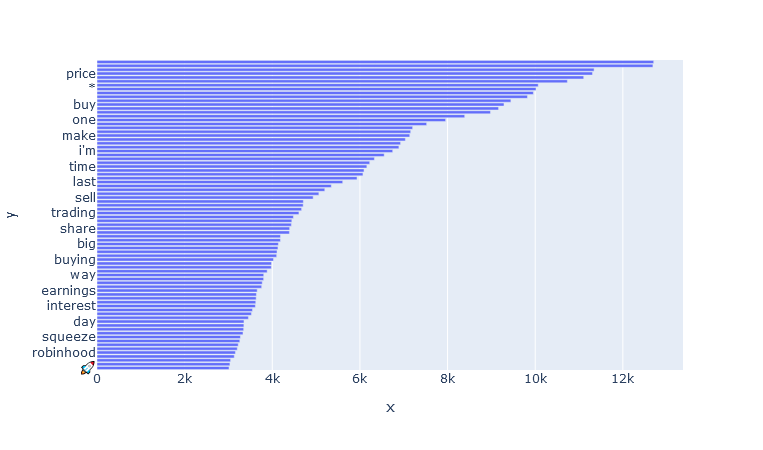

In [88]:
import plotly.express as px

top_20_words = {}

for (key, value) in counts_body.items():
   # Check if value is greater than 3000 and add to new dictionary
    if value != "nan" and value > 3000:
        top_20_words[key] = value
    continue

sorted_top_20_words = dict(sorted(top_20_words.items(), key=lambda item: item[1], reverse=False))

word = sorted_top_20_words.keys()
count = sorted_top_20_words.values()


# fig = px.bar(y=word, x=count, text = count)
fig = px.bar(y=list(word), x=list(count), text = list(count))
fig.update_traces(texttemplate='%{text:}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

# **Let's see what are the most popular tickers mentioned in the body text**

In [89]:
nyse_tickers = pd.read_csv("./nyse-listed_csv.csv")
other_tickers = pd.read_csv("./other-listed_csv.csv")

In [90]:
nyse_tickers.head()

,ACT Symbol,Company Name
0,A,"Agilent Technologies, Inc. Common Stock"
1,AA,Alcoa Inc. Common Stock
2,AA$B,Alcoa Inc. Depository Shares Representing 1/10...
3,AAC,"AAC Holdings, Inc. Common Stock"
4,AAN,"Aaron's, Inc. Common Stock"


In [91]:
nyse_tickers_list = list(nyse_tickers['ACT Symbol'].str.lower())
other_tickers_list = list(other_tickers['ACT Symbol'].str.lower())
nyse_tickers_list[0:10]

['a', 'aa', 'aa$b', 'aac', 'aan', 'aap', 'aat', 'aav', 'ab', 'abb']

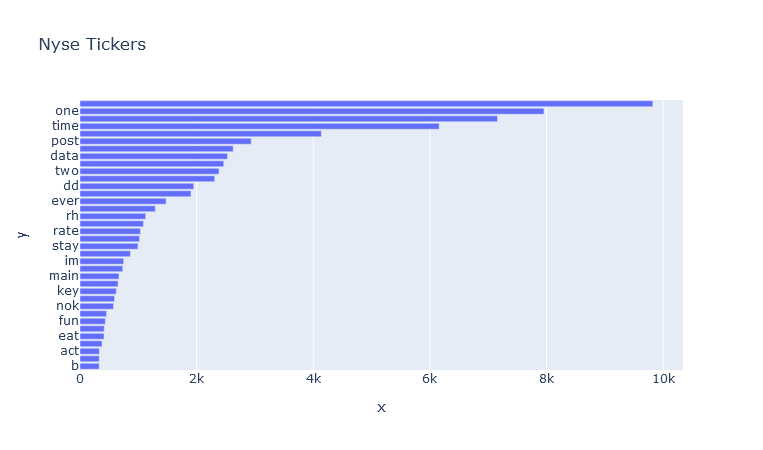

In [92]:
import plotly.express as px

top_words = {}

for (key, value) in counts_body.items():
   # Check if value is greater than 100 and add to new dictionary
    if key in nyse_tickers_list and value > 300: 
        top_words[key] = value
    continue
    
sorted_top_words = dict(sorted(top_words.items(), key=lambda item: item[1], reverse=False))

word = sorted_top_words.keys()
count = sorted_top_words.values()

# fig = px.bar(y=word, x=count, text = count, title='Nyse Tickers')
fig = px.bar(y=list(word), x=list(count), text = list(count), title='Nyse Tickers')
fig.update_traces(texttemplate='%{text:}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()



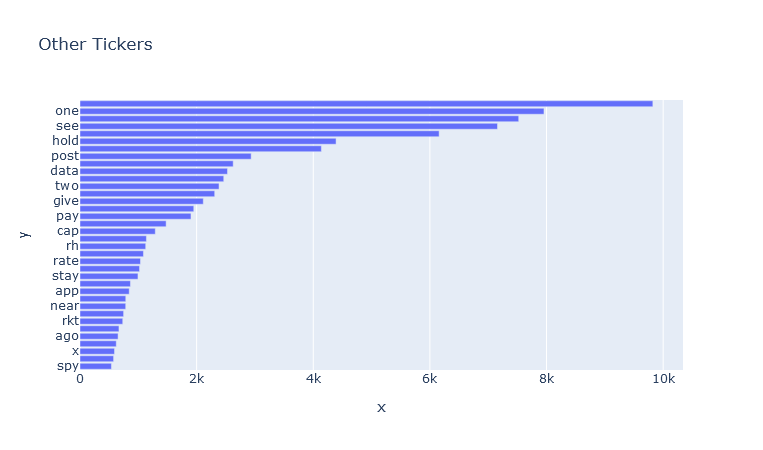

In [93]:
import plotly.express as px

top_words = {}

for (key, value) in counts_body.items():
   # Check if value is greater than 100 and add to new dictionary
    if key in other_tickers_list and value > 500: 
        top_words[key] = value
    continue
    
sorted_top_words = dict(sorted(top_words.items(), key=lambda item: item[1], reverse=False))

word = sorted_top_words.keys()
count = sorted_top_words.values()

# fig = px.bar(y=word, x=count, text = count, title='Other Tickers')
fig = px.bar(y=list(word), x=list(count), text = list(count), title='Other Tickers')
fig.update_traces(texttemplate='%{text:}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

# 2 - New Section
to combine Title and Body to 

## Step 1 Set up (From Original code)

In [2]:
import os
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from datetime import date, datetime
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from scipy import stats
from nltk.corpus import stopwords
from collections import Counter

In [3]:
# additional imports
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import datetime
import time
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
# from datetime import date, datetime
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### 1.1 Read file and check file

In [8]:
# for testing delete
df = pd.read_csv('./reddit_wsb.csv')
df.head(2)

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10


#### 1.2 Drop useless columns

In [9]:
# for testing delete
df = df.drop(columns=['id', 'url', 'created'])
df.head(2)

,title,score,comms_num,body,timestamp
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10


#### 1.3 Add a few data realted columns for further analysis

In [11]:
# for testing delete
from datetime import date, datetime
year_col = []
month_col = []
hour_col = []
minute_col = []
for i, content in df['timestamp'].items():
    t1 = datetime.strptime(content, '%Y-%m-%d %H:%M:%S')
    year_col.append(t1.year)
    month_col.append(t1.month)
    hour_col.append(t1.hour)
    minute_col.append(t1.minute)
df['year'] = year_col
df['month'] = month_col
df['hour'] = hour_col
df['minute'] = minute_col
df.head(2)

,title,score,comms_num,body,timestamp,year,month,hour,minute
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41,2021,1,21,37
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,2021,1,21,32


#### Normalize the text to be lowercase

In [12]:
# for testing delete
df['title'] = df['title'].str.lower()
df['body'] = df['body'].str.lower()

In [ ]:
# for testing delete
df.drop_duplicates(subset=['title'], keep='first', inplace=True)
df.shape

#### 1.4 Descriptive statistics - title

**Count the number of characters and length of a title**

In [ ]:
# for testing delete
count = df['title'].str.split().str.len()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)

print("Total number of words: ", count.sum(), "words")

In [ ]:
# for testing delete
print("Average number of words per post: ", round(count.mean(),2), "words")
print("Max number of words per post: ", count.max(), "words")
print("Min number of words per post: ", count.min(), "words")

In [4]:
def word_count(df):
    """
    This function takes the dataframe and adds a new colun with the number of words.
    :param df: The dataframe to be transformed.
    :return: The transformed dataframe.
    """
    words_count = []
    for i, content in df['title'].items():
        new_values =[]
        new_values = content.split()
        words_count.append(len(new_values))
    df['title_word_count'] = words_count
    return df

# df = word_count(df)

# df.head(2)

In [ ]:
# for testing delete
df['title_length'] = df['title'].str.len()

print("Total length of a dataset: ", df.title_length.sum(), "characters")
print("Average length of a tweet: ", round(df.title_length.mean(),0), "characters")
print(df.head(2))

In [ ]:
#for testing delte
df.head(2)

#### 1.5 function to get data and clean up in two function
First Function to read from file. This can be replace by reading real data<br>
Second Function to combine and clean the data as in functions above

### **start testing here after loading libraries**

In [4]:
# start testing here
df_raw = pd.read_csv('./reddit_wsb.csv')

In [5]:
def clean_data(in_df):
    #clean data and return a "standrd form"
    # input input data frame as describe above
    # output: cleand data frame
    from datetime import date, datetime # get librareis
    df = in_df.copy() # make a copy
    df = df.drop(columns=['id', 'url', 'created']) # drop unused columns
    
    #add date and time
    year_col = []
    month_col = []
    hour_col = []
    minute_col = []
    day_col = [] # v 1.6 add day colummn
    date_col = [] #
    for i, content in df['timestamp'].items():
        t1 = datetime.strptime(content, '%Y-%m-%d %H:%M:%S')
        year_col.append(t1.year)
        month_col.append(t1.month)
        hour_col.append(t1.hour)
        minute_col.append(t1.minute)
        day_col.append(t1.day) #v 1.6 add day column
        date_col.append(t1.date())
    df['year'] = year_col
    df['month'] = month_col
    df['hour'] = hour_col
    df['minute'] = minute_col 
    df['day'] = day_col # v 1.6 add day col
    df['date'] = date_col
    
    #Normalize the text to be lowercase
    df['title'] = df['title'].str.lower()
    df['body'] = df['body'].str.lower()
    df.drop_duplicates(subset=['title'], keep='first', inplace=True)

    #Count the number of characters and length of a title
    df = word_count(df)
    df['title_length'] = df['title'].str.len()
    
    #return value
    return df

In [33]:
# debug delete
df = clean_data(df_raw)
df.head(2)
# datetime.strptime(content, '%Y-%m-%d %H:%M:%S')
# test_ymd = datetime.strptime(df['timestamp'][0], '%Y-%m-%d %H:%M:%S')
# test_ymd.day

,title,score,comms_num,body,timestamp,year,month,hour,minute,day,title_word_count,title_length
0,"it's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41,2021,1,21,37,28,11,59
1,math professor scott steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,2021,1,21,32,28,12,80


## Step 2, Combine Title and Body (start of new code)

In [ ]:
# df.head(2)

In [ ]:
# debug delete
# make a copy so original is not damanged and drop where there is no text in title or body
new_df = df[~(df['title'].isna() & df ['body'].isna() )].copy()
# convertitle and body to string and concaterante
new_df ['title_body'] = df['title'].astype(str) + ' ' + df ['body'].astype(str)
new_df.head()

#### 2.1 combine title and body in to one column

In [6]:
def combine_columns(in_df, in_col1, in_col2):
    #combine two columns into one
    #convert columns to text and concat
    #input:
    #in_df - datafraem
    #in_col1 - name of column 1
    #in_col2 - name of column 2
    #return data_frame with extract column
    
#     # make a copy so original is not damanged and drop where there is no text in title or body

    # convertitle and body to string and concaterante
    new_df = in_df.copy()
    new_df [in_col1 + '_' + in_col2] = in_df[in_col1].astype(str) + ' ' + in_df [in_col2].astype(str)
    return new_df


In [ ]:
# for testing delete
test_df = combine_columns(df, 'title', 'body')
test_df.head(2)

#### 2.2 routine to do count of ticker.

In [7]:
def find_comment_count(in_df, in_word_list, in_column): 
    # purpose: finds count of words in a column and creates named coumns with counts
    #inputs: 
    #in_df - input dataframe 
    #in_word_list list of words to find
    #in_column the column in which the wordsare
    #output:
    #a copy of the original data with columns added for word count
    
    #code here
    #put in error handler
    try:
        tmp_df = in_df.copy() #make a copy of the dataframe
        tmp_df [in_column] = tmp_df [in_column].astype(str) # convrt to string
        srch_word_list = [str(x) for x in in_word_list] #convert everthing words list to string
        #wordList = re.sub("[^\w]", " ",  mystr).split()
        tmp_df[in_column + '_list'] = tmp_df[in_column].apply (lambda x: re.sub("[^\w]", " ",  x).split()) # convert into a list of words
        
        # loop through list of words and create counts
        for cur_word in srch_word_list:
            # v 1.8 dont look at list,  look in original column with 
            #tmp_df [cur_word + '_count'] = tmp_df[in_column + '_list'].apply(lambda x: x.count(cur_word))
            lower_word = cur_word.lower()# v 1.8
            tmp_df [cur_word + '_count'] = tmp_df[in_column].apply(lambda x: x.count(lower_word)) # v 1.8
        return tmp_df
        
    except:
        #if eror then return null
        return null 
        

In [35]:
# delete
test_df = find_comment_count(test_df, ['GME'], 'title_body')

In [ ]:
# delete
test_df.head(2)

## Step 3 Get emotions from each combined message

In [ ]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

### 3.1 function to add vader emotion to each message

In [8]:
# function to calculate vader sentiment
def add_vader_compound(in_df, in_column):
    #take and input column, add vader sentiment
    # make sure nltk and vader is downloaded 
    
    # if not downloaded, uncomment and download
    # Download/Update the VADER Lexicon
    #nltk.download('vader_lexicon')
    #from nltk.sentiment.vader import SentimentIntensityAnalyzer
    # Initialize the VADER sentiment analyzer
    # analyzer = SentimentIntensityAnalyzer()
    nltk.download('vader_lexicon')

    try:
        tmp_df = in_df.copy() #make a copy of the dataframe
        tmp_df [in_column] = tmp_df [in_column].astype(str) # convrt to string
        analyzer = SentimentIntensityAnalyzer() # set analyzer
        tmp_df[in_column + '_sent'] = tmp_df [in_column].apply (lambda x: analyzer.polarity_scores(x)['compound'])
        
            
        return tmp_df
        
    except:
        #if eror then return null
        return null
    

In [ ]:
# delete
# test code for vader
# test= test_df.copy()
test1_df = add_vader_compound(test_df, 'title_body')
test1_df.head(2)

In [155]:
# dletee
analyzer = SentimentIntensityAnalyzer()
test['sent'] = test['title_body'].apply (lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
# delete
test.tail(2)

## Step 4 get stock price at that time

In [9]:
def get_prices (in_tick, in_strt_date, in_end_date,in_timeframe, in_env_path):
    # return a dataframe with stock price info from Alpaca by the minute
    # inputs:
    # in_tick - string with ticker symbol
    # in_start_date as a start date in format: beg_date = '2021-01-05'
    # in_end_date in format: end_date = '2021-01-05'
    # in_timeframe set as interval for stock price
    # in_env_path path for enviornment file
    # return:
    # data frame with stock prices.
    
    #note works for 1000 items. how to get longer times.
    from alpaca_trade_api.rest import TimeFrame
    try:
        #load environment
        load_dotenv(in_env_path)
        
        #get alpaka keys
        alpaca_api_key = os.getenv("ALPACA_API_KEY")
        alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
#         print (f'alpaca api {alpaca_api_key}\n')
#         print (f'alpaca secret {alpaca_secret_key}\n')
        #set up alpaca
        api = tradeapi.REST(
        alpaca_api_key,
        alpaca_secret_key,
        api_version = "v2"
        )
    
        start =  pd.Timestamp(f'{in_strt_date} 09:30:00-0400', tz='America/New_York').replace(hour=9, minute=30, second=0).astimezone('GMT').isoformat()[:-6]+'Z'
        end   =  pd.Timestamp(f'{in_end_date} 16:00:00-0400', tz='America/New_York').replace(hour=16, minute=0, second=0).astimezone('GMT').isoformat()[:-6]+'Z'
#         print (f'start: {start}\n')
#         print (f'end: {end}\n')
#         prices = api.get_barset(in_tick, TimeFrame.Hours,limit=1000, start=start, end=end).df
        prices = api.get_barset(in_tick, in_timeframe,limit=1000, start=start, end=end).df
        
        #add date colum
        prices['date'] = prices.index.map(lambda x: x.date())
        
        return prices

    except:
        return null

In [14]:
# delete
from alpaca_trade_api.rest import TimeFrame
price_df = get_prices('GME', '2021-01-28', '2021-06-01', '1D','test1.env' )

In [123]:
# delete
price_df.index[0].date()
test_df = price_df.copy()

test_df.head(2)

GME                                    \
                             open    high     low   close    volume   
time                                                                  
2021-01-28 00:00:00-05:00  265.00  483.00  112.25  197.44  46894357   
2021-01-29 00:00:00-05:00  379.71  413.98  250.00  328.24  44002649   

                                 date  
                                       
time                                   
2021-01-28 00:00:00-05:00  2021-01-28  
2021-01-29 00:00:00-05:00  2021-01-29

## Step 5 combine price with data and emotion



In [10]:


def comb_sent_mention(in_df, in_tick, in_timeframe,in_start_date, in_end_date, in_env_file, in_col1, in_col2 ):
    #creates a combined data frame for a from data struct
    # input:
    # in_df = input data frame
    # in_tick =  ticker symbo
    # in_timeframe = suggest '1D'
    # in_start_date = in the form'2021-01-28'
    # in_end_date = in the form '2021-01-28'
    # in_env_file = in this case'test1.env' 
    # in_col1 = in this case 'title'
    # in_col2 = in this case 'body'   
    # output:
    # cobined dta frame

#     price_df = get_prices(in_tick, in_start_date, in_end_date, in_timeframe,in_env_file) # get price from alpaa - not used here..
    df_clean = clean_data(in_df) # clean it up
    df = combine_columns(df_clean, in_col1, in_col2) # combine title and body
    comb_col_title = in_col1 + '_' + in_col2 # combine the column titles
    df = find_comment_count(df, [in_tick], comb_col_title) # find number of mentions 
    df = add_vader_compound(df, comb_col_title) # add emotion
    
    #sum sentiment and count by day - future fix add variable lenght
    grpby_cols = ['year', 'month', 'day']
    sum_by_cols = [in_tick + '_count', comb_col_title + '_sent' ]
    tmp_df = df.groupby(grpby_cols)[sum_by_cols].sum().add_suffix('_sum')
    df = df.join (tmp_df, on = grpby_cols)
    
    return df
    
    

In [11]:
# delete
in_df = pd.read_csv('./reddit_wsb.csv')
test_df = comb_sent_mention(in_df, 'GME', '1D', '2021-01-28','2021-06-28' , 'test1.env' ,  'title', 'body')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
# delete
test_df.sample(2)

,title,score,comms_num,body,timestamp,year,month,hour,minute,day,date,title_word_count,title_length,title_body,title_body_list,GME_count,title_body_sent,GME_count_sum,title_body_sent_sum
47034,the weekly market recap for gamblers and degen...,40,10,"what’s poppin bull-gang, flux here with your w...",2021-05-15 07:22:33,2021,5,7,22,15,2021-05-15,14,75,the weekly market recap for gamblers and degen...,"[the, weekly, market, recap, for, gamblers, an...",0,0.9954,15,27.6013
18944,think twice before investing in $slv,175,299,slv saw an inflow of almost one billions dolla...,2021-01-31 08:20:02,2021,1,8,20,31,2021-01-31,6,36,think twice before investing in $slv slv saw a...,"[think, twice, before, investing, in, slv, slv...",0,0.9198,1074,145.5458


In [87]:
# delete
# from datetime import date, datetime
# datetime.strptime(test_df['timestamp'][0], '%Y-%m-%d %H:%M:%S').date()

datetime.date(2021, 1, 28)

## Step 6 combine with daily price of stock.

In [19]:
# create new dataframe of only date, sentiment, world count, price, volueme mentions
new_df = test_df[['date', 'GME_count_sum', 'title_body_sent_sum']].copy()
new_df.drop_duplicates(inplace = True)
new_df.rename (columns = {'GME_count_sum': 'mentions', 'title_body_sent_sum': 'sentiment' }, inplace = True)
new_df.set_index('date', inplace = True)
new_df.head(2)

,mentions,sentiment
date,,
2021-01-28,656,29.9272
2021-01-29,6254,-125.7006


In [20]:
# new_prices = price_df [['date']]
# new_prices = price_df[price_df.loc['GME']['close']]
new_prices = price_df ['GME']
new_prices ['date'] = price_df['date']
new_prices.set_index('date', inplace = True)
new_prices.head(2)

,open,high,low,close,volume
date,,,,,
2021-01-28,265.00,483.00,112.25,197.44,46894357
2021-01-29,379.71,413.98,250.00,328.24,44002649


In [21]:
# new_prices = price_df.copy()
new_prices = pd.DataFrame()
# new_prices['close']  = price_df['GME', 'close'].copy()
# new_prices['volume'] = price_df['GME', 'close'].copy()
# new_prices['date'] = new_prices.index.map(lambda x: x.date())
# new_prices.reset_index(inplace = True)
# new_prices.drop (columns = 'time', inplace = True)
new_prices = price_df ['GME'].copy()
new_prices['date'] = new_prices.index.map(lambda x: x.date())
new_prices.reset_index(inplace = True)
new_prices.drop (columns = ['time', 'open', 'high', 'low'], inplace = True)
new_prices.set_index('date', inplace = True) 
new_prices.head(2)


,close,volume
date,,
2021-01-28,197.44,46894357
2021-01-29,328.24,44002649


In [22]:
output_df = new_prices.join (new_df, how = 'left', on = 'date')
output_df ['stock'] = 'GME'
# output_df.head()
output_df.shape
output_df.head()
# output_df.to_csv('sample_gme.csv')

,close,volume,mentions,sentiment,stock
date,,,,,
2021-01-28,197.4400,46894357,656.0,29.9272,GME
2021-01-29,328.2400,44002649,6254.0,-125.7006,GME
2021-02-01,227.0000,32080874,905.0,149.0855,GME
2021-02-02,90.4700,71418097,964.0,141.5159,GME
2021-02-03,92.0431,37591533,1438.0,226.2474,GME


## Step 7 Start ML part

### 7.1 Function to create combined dataframe for macine learning
1. take company 

In [25]:
# create a copy.
test1_df = output_df.copy()

In [27]:
test_df['pct_ch'] = test_df['close'].pct_change()

KeyError: 'close'